# importing libraries

In [52]:
import os
import re

import cv2 as cv
import numpy as np

import pytesseract as pt
# from pytesseract import image_to_string
import matplotlib.pyplot as plt

import tempfile
from pdf2image import convert_from_path

import docx
#create instance of a word document
doc = docx.Document()

In [63]:
#from image to string
def image_to_text(file, mode):
    if mode == "eng":
        custom_config = r'-l eng --oem 1 --psm 3'
        text = pt.image_to_string(file, config=custom_config)
    elif mode == "nep":
        custom_config = r'-l nep --oem 3 --psm 1'
        text = pt.image_to_string(file, config=custom_config)
    else:
        custom_config = r'-l nep+eng --oem 1 --psm 1'
        text = pt.image_to_string(file, config=custom_config)
        
    box = pt.image_to_data(file, config=custom_config)
    return text, box

In [71]:
#image preprocessing
#preprocessing
def thresholding(image):
    gray_img = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    ret,thresh = cv.threshold(gray_img, 0, 255, cv.THRESH_OTSU | cv.THRESH_BINARY_INV)
    return thresh

def dilation(thresh_img):
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (14, 14))

    # Applying dilation on the threshold image
    dilated_image = cv.dilate(thresh_img, kernel, iterations = 1)
    return dilated_image

def get_text(image, mode):
    thresh_img = thresholding(image)
    dilated_img = dilation(thresh_img)

    # Finding contours
    (contours, heirarchy) = cv.findContours(dilated_img.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
    
    #mask = np.zeros(original_image.shape, np.uint8)

    # Looping through the identified contours
    # Then rectangular part is cropped and passed on to pytesseract
    # pytesseract extracts the text inside each contours
    # Extracted text is then written into a text file
    final_text = ''
    for cnt in contours:
    
        # Apply OCR on the copied image
        final_text += image_to_text(image, mode)[0]
        break

        # masked = cv.drawContours(mask, [cnt], 0, (255, 255, 255), -1)
    box = image_to_text(image, mode)[1]
    for z, a in enumerate(box.splitlines()):
        if z != 0:
            a = a.split()
            if len(a) == 12:
                x,y = int(a[6]), int(a[7])
                w,h = int(a[8]), int(a[9])
            
                cv.rectangle(image, (x,y), (x + w, y + h), (0,255,0), 1)

    for cnt in contours:
        x, y, w, h = cv.boundingRect(cnt)

        cv.rectangle(image, (x,y), (x+w, y+h), (0, 255, 0), 1)

    plt.figure(figsize=(10,8))
    plt.imshow(image);plt.title("contour drawn on image");plt.axis("off");
    plt.show()
    
    return final_text

In [72]:
#Extract Text
def extract_text(filepath, mode):
    if filepath.lower().endswith(('.png', '.jpg', '.jpeg')):
        original_img = cv.imread(filepath)
        return get_text(original_img, mode)
        
    elif filepath.endswith('pdf'):
        # save temp image files in temp dir, delete them after we are finished
        with tempfile.TemporaryDirectory() as temp_dir:
            # convert pdf to multiple image
            images = convert_from_path(filepath)
            # save images to temporary directory
            temp_images = []
            for i in range(len(images)):
                image_path = f'{temp_dir}/{i}.jpg'
                images[i].save(image_path, 'JPEG')
                temp_images.append(image_path)

            final_text = " "
            for pg, img in enumerate(temp_images):
                original_img = cv.imread(img)

                final_text += "---"+get_text(original_img, mode)

                #print(f"page number: {pg}")
                #print(final_text)
                    
        return final_text #final_text
    
    else: 
        return "invalid file format!!!"
    

enter 'nep' for nepali, 'eng' for english or 'both' for both ocr mode: nep
enter the file path: test_file/screenshot.png


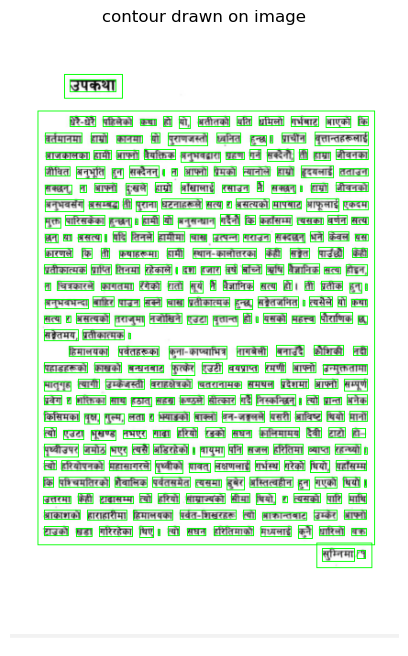

उपकथा

धेरै-धेरै पहिलेको कथा हो यो, अतीतको यति धमिलो गर्भबाट आएको कि
जर्तमानमा हाम्रो कानमा यो पुराणजस्तो ध्यनिता हुन्छ । प्राचीन बुतान्तहरूलाई
आजकालका हामी आफ्नो वैयक्तिक अनुभवद्ारा प्रहण गर्न सक्दैनौ, ती हाम्रा जीवनका
औवित अनुभूति हुन सक्दैनन्‌ । न आफ्नौ प्रैमको न्यानोले हाम्रो हृदबनाई तताउन
सक्छन्‌, न आफ्नो दुखे हाम्रो आँखालाई रसाउन नै सक्छन्‌ । हाम्रो जीवनको
अनुभवसँग असम्बड ती पुराना घटताहरूले सत्य र असत्यको मापबाट आफूलाई एकदम
मुक्त पारिसकेका हुन्छन्‌ । हामी यो अनुसन्धान गर्दैनौ कि कहाँसम्म त्यसका वर्णन सत्य
जत या असत्य | बढि तिनले हामीमा चाख उत्पन्न गराउन सक्दछत्‌ धने केवल यस
कारणले कि ती कथाहरूमा हामी स्थान-कालोतरका केही सत पाउँछौ केही
प्रतीकात्मक प्राप्त तिनमा रहेकाले । दश हजार वर्ष बाँच्ने श्रधि वैज्ञानिक सत्य होइन,
ज चिजकारमे कागतमा रँगेको रातौ सूर्य नै वैज्ञानिक सत्य हौ। ती प्रतीक हुन्‌ ।
अनुभवभन्दा बाहिर पाउन सस्नै चाख प्रतीकात्मक हुन्छ, सक्ेतजनित । त्यसैले यो कथा
सत्य र असत्यको तराजुमा नजोखिने एउटा युतान्त हो । यसको महत्व पौराशिक छ,
सञ्ेतमय, प्रतीकात्यक ।

हिमालयका पर्वतहरू

In [77]:
%%time

mode = input("enter 'nep' for nepali, 'eng' for english or 'both' for both ocr mode: ").lower()
filepath = input("enter the file path: ")

text = extract_text(filepath, mode)
print(text)

In [6]:
text1 = text.split("---")
print(len(text1))

1


In [7]:
for txt in text1:
    print(txt)

भा मममकि अम्जन- बकलादेशबाट सक्दो लान लिगस्‌ 13 ५ 6,
क्त्रन्तिफुर्‌ [ प््डे ५
सातै प्रदेशबाठ एकैसाथ प्रकाशित

स्््ि जान
खोज्दा बन्धक

मलावीमा ६ नेपालीको उद्धार, ५ जना अझै गिरोहको कब्जामा




In [8]:
for i in range(len(text1)):
    # add a heading of level 0 (largest heading)
    doc.add_heading(f'page: {i}', 0)
    doc.add_paragraph(text1[i])
    doc.add_page_break()

output_path = filepath.split(".")[0]+'.docx'
try:
    doc.save(output_path)
    print("success!!!")
except:
    print("file already exists.")

success!!!
